[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nilsjennissen/simulations/blob/main/notebooks/simulation_class.ipynb)

# Simulations

In [51]:
# importing packages
import random
import numpy as np
import matplotlib.pyplot as plt

## Creating a class for a species
A python class is a template for creating objects. It defines the attributes and methods of a species.

In [109]:
# A class of species that is entirely driven by birth and death rates

# Create class Existor
class Simulation(object):

    # Define the attributes of the class
    def __init__(self, population, birth_rate, death_rate):
        self.population = population
        self.birth_rate = birth_rate
        self.death_rate = death_rate

    # Function to update the population based on birth and death rates
    def update(self):
        if random.randint(0, 100) < self.birth_rate:
            self.population += 1
        for organism in range(self.population):
            if random.randint(0, 100) < self.death_rate:
                self.population -= 1

    # Function to calculate the equilibrium population
    def get_equilibrium(self):
        return(self.birth_rate/self.death_rate)

    # Takes three arguments: number of cycles, whether to plot equilibrium, whether to plot mean
    def plot_pop(self, cycles, with_equilibrium = False, with_mean = False):
        Y = []
        for cycle in range(cycles):
            self.update()
            Y.append(self.population)

        # Plot size
        plt.figure(figsize=(12, 5))
        plt.ylim(0, 5*self.get_equilibrium())
        plt.plot(Y, label='Population')

        if with_mean:
            mean = sum(Y)/len(Y)
            plt.plot([mean for i in range(cycles)], label = 'Mean population')

        if with_equilibrium:
            plt.plot([self.get_equilibrium() for i in range(cycles)], label = 'Predicted equilibrium')
        plt.xlabel('Cycles')
        plt.ylabel('Number of organisms')
        plt.legend()
        plt.show()


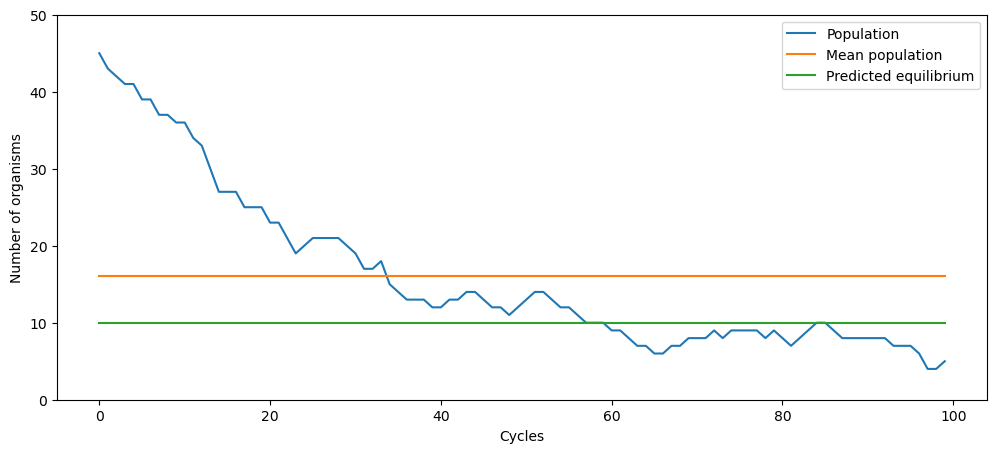

In [112]:
# Start a simulation with the parameters: population, birth_rate, death_rate
sim = Simulation(50, 50, 5)

# Plot the population and specify: number of cycles, equilibrium, mean
sim.plot_pop(100, True, True)

In [127]:
# Adding more realistic child class of Species as organisms can replicate
class Replicator(Simulation):

    # Update the init function to include a replication rate
    def __init__(self, population, birth_rate, death_rate, replication_rate):
        Simulation.__init__(self, population, birth_rate, death_rate)
        self.replication_rate = replication_rate

    # Inherit the update function from the parent class and add a replication step
    def update(self):
        Simulation.update(self)
        for organism in range(self.population):
            if random.randint(0, 100) < self.replication_rate:
                self.population += 1

    # Inherit the get_equilibrium function from the parent class and add the replication rate
    def get_equilibrium(self):
        return(self.birth_rate/(self.death_rate - self.replication_rate))

    # Inherit the plot funtion to show the y lim with the max of the population over time
    def plot_pop(self, cycles, with_equilibrium = False, with_mean = False):
        Y = []
        for cycle in range(cycles):
            self.update()
            Y.append(self.population)

        # Plot size
        plt.figure(figsize=(12, 5))
        plt.ylim(0, max(Y))
        plt.plot(Y, label='Population')

        if with_mean:
            mean = sum(Y)/len(Y)
            plt.plot([mean for i in range(cycles)], label = 'Mean population')

        if with_equilibrium:
            plt.plot([self.get_equilibrium() for i in range(cycles)], label = 'Predicted equilibrium')
        plt.xlabel('Cycles')
        plt.ylabel('Number of organisms')
        plt.legend()
        plt.show()

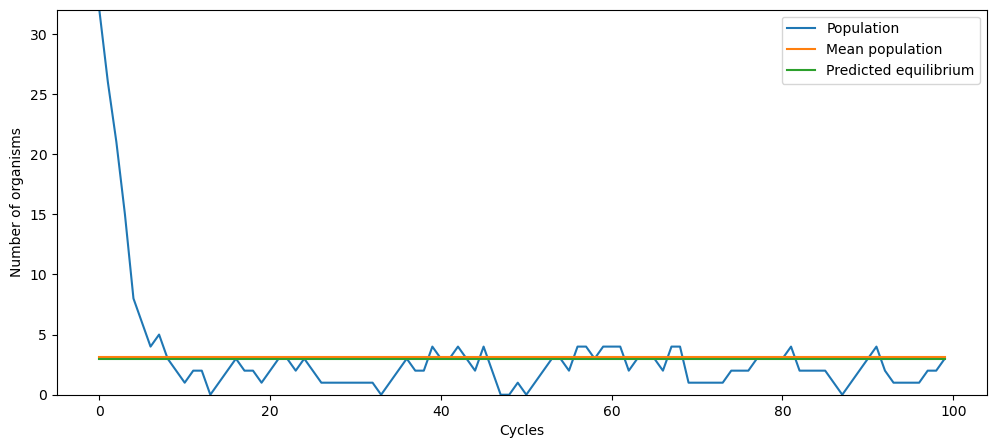

In [128]:
# Start a simulation with the parameters: population, birth_rate, death_rate, replication_rate
Replicator = Replicator(50, 90, 40, 10)

# Plot the population and specify: number of cycles, equilibrium, mean
Replicator.plot_pop(100, True, True)